# Credit Card Customers Churn Analysis 

This notebook aims to predict churned customers and exploratory analysis of insights related to the Credit Card Customers dataset taken from the Kaggle platform for Udacity "Write a Data Scientist Blog Post" project

Description and context: A bank manager is in a scenario where several customers are leaving their credit card services. It would be extremely interesting for the company to be able to predict the customers most likely to leave such services so that, in this way, the bank can act preventively in order to offer better services in favor of maintaining the customer.

[...] The data set has 10,000 customers with attributes such as age, salary, marital status, credit limit, card category, among others. There are approximately 18 features in the whole set and there are only 16.0% of customers with churn

## 1_Business and Data Understanding 

The goal of this notebook is to answer both tasks given for the "Credit Card Customers" - dataset.

The first goal of this project is to provide an analysis which shows the difference between a non-churning and churning customer. This will provide us insight into which customers are eager to churn.

The top priority of this case is to identify if a customer will churn or won't. It's important that we don't predict churning as non-churning customers. That's why the model needs to be evaluated on the "Recall"- metric (goal > 62%).

- How many customers have some attrition with the bank?
- How demographic variables are impact to earger the churn ?
- How are the relationship with the variables vs churn ? 
- What are the diffirences between Non Churn and Churn Profiles ? 

## Data Preprocessing for Business and Data Understanding


### Importing Necessary Libraries for Business Understanding Data Process

In [1]:
# Used for EDA, Customer profiling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Presets
%matplotlib inline
sns.set()

### Data Set

The building block of any data science project is the data. Underneed you can find one data record which will be used in further analysis. The dataset consist of 10000 samples describing the customers and it's behavior.

The following columns/features can be split up in the following groups:

* ***Unique Id***:
    * **CLIENTNUM** : Unique identifier for the customer holding the account.


* ***Target/Label***:
    * **Attrition_Flag**: Internal event (customer activity) variable - Existing Customer / Attrited Customer


* ***Demographic variables***:
    * **Customer_Age**: Demographic variable - Customer's Age in Years.
    * **Gender**: Demographic variable - M=Male, F=Female.
    * **Dependent_count**: Demographic variable - Number of dependents.
    * **Education_Level**: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.).
    * **Marital_Status**: Demographic variable - Married, Single, Divorced, Unknown.
    * **Income_Category**: Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >).
    

* ***Product variables***:
    * **Card_Category**: Product Variable - Type of Card (Blue, Silver, Gold, Platinum).
    * **Months_on_book**: Period of relationship with bank.
    * **Total_Relationship_Count**: Total no. of products held by the customer.
    * **Months_Inactive_12_mon**: No. of Months in the last 12 months.
    * **Contacts_Count_12_mon**: No. of Contacts in the last 12 months.
    * **Credit_Limit**: Credit Limit on the Credit Card.
    * **Total_Revolving_Bal**: Total Revolving Balance on the Credit Card.
    * **Avg_Open_To_Buy**: Open to Buy Credit Line (Average of last 12 months
    * **Total_Amt_Chng_Q4_Q1**: Change in Transaction Amount (Q4 over Q1).
    * **Total_Trans_Amt**: Total Transaction Amount (Last 12 months).
    * **Total_Trans_Ct**: Total Transaction Count (Last 12 months).
    * **Total_Ct_Chng_Q4_Q1**: Change in Transaction Count (Q4 over Q1).
    * **Avg_Utilization_Ratio**: Average Card Utilization Ratio.


* ***Unimportant variables***:
    * **Naive_Bayes**: It was mentioned that all columns containing the "N.B."-tag should be disregarded.


In [2]:
#Read csv file, from your local machine and quick look the dataset
df = pd.read_csv('./BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### Data Preprocessing
In this phase we'll quickly explore the data and remove/impute incorrect values. So that a cleaned data can be used for further analysis/modelling.

* Remove unnecessary columns.
* Check for duplicates.
* Change ID to client number.
* Check for null values.

In [3]:
# Copy Original Dataset, 
df_original=df.copy()

# Removing the unnecessary columns, these columns are unimportant
df = df.drop(columns= ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [4]:
# Quick look at column names
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [5]:
# Look at variables info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
CLIENTNUM                   10127 non-null int64
Attrition_Flag              10127 non-null object
Customer_Age                10127 non-null int64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             10127 non-null object
Marital_Status              10127 non-null object
Income_Category             10127 non-null object
Card_Category               10127 non-null object
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float64
Total_Trans_Amt             10127 non-null int

In [6]:
# Check for duplicates, True if duplicates are present
df.duplicated().any()

## No duplicate variables are found.

False

In [7]:
# Check for missing values, the number of columns with any missing values

if df.columns[df.isnull().sum() > 0].shape[0] > 0:
    df.columns[df.isnull.sum() >0]
else:
    print("No Missing valeus are found")

No Missing valeus are found


In [8]:
# Change the ID to the ClientNumber
# Client number is a unique identifier variable
df = df.set_index("CLIENTNUM")

To understand better impact of age, I create a new age column with 20 year bins. For this, I use pandas-cut function. You find details of this function : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

In [9]:
# Create a new column (Age_Range) with 20-year bins
df['Age_Range'] = pd.cut(x=df['Customer_Age'], bins=[20, 30, 40, 50, 60, 80], labels= ['20-30','30-40','40-50','50-60','60+'])
df['Age_Range'].head(10)

CLIENTNUM
768805383    40-50
818770008    40-50
713982108    50-60
769911858    30-40
709106358    30-40
713061558    40-50
810347208    50-60
818906208    30-40
710930508    30-40
719661558    40-50
Name: Age_Range, dtype: category
Categories (5, object): [20-30 < 30-40 < 40-50 < 50-60 < 60+]

In [10]:
# subset data frame 2 group 
churned = df[df['Attrition_Flag'] == 'Attrited Customer']# Subset df to only those with churned of 1
notchurned= df[df['Attrition_Flag'] == 'Existing Customer'] # Subset df to only those with notchurned of 0

print((churned.shape))
print((notchurned.shape))

(1627, 21)
(8500, 21)


### Question1 - How many customers have some attrition with the bank ?

In order to understand how many customers have some attrition, we will look at the Attrition_Flag field.

**Attrition_Flag:** Internal event (customer activity) variable - Existing Customer / Attrited Customer


**Results:** The graph below reveals that approximately 16% of the customers present at the base have some type of friction with the financial institution. This is an important slice of analysis, given that it basically represents the target audience of customers who, in some way, are not comfortable with the services offered by this financial institution.

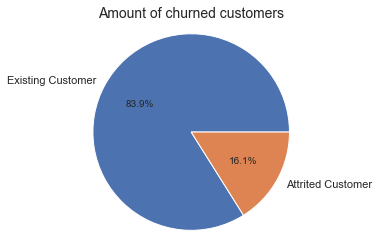

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


In [11]:
# Create a new column for Attrited Customer
# Existing 'Attrition_Flag' column is an object column, we create e new numeric variable for model and analysis
# Attrited Customer = 1, Existing Customer = 0 
df['AttritedFlag'] = np.where( df['Attrition_Flag'] == 'Attrited Customer', 1, 0) 

# Create a pie chart for Attrition_Flag
target = df["Attrition_Flag"].value_counts()

fig1, ax1 = plt.subplots()

ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
ax1.axis('equal')
plt.title("Amount of churned customers", fontsize=14)
plt.show()

print (target)

### Question2 - How demographic variables are impact to earger the churn ?

In this first exploratory analysis session, demographic variables present in the database, such as age, gender, dependents, education, among others, will be discussed. The objective is to understand the public of this banking institution a little better and to cross these factors with other key variables that can better define possible customer migrations.

We analyze that how demografic variables which are **"Age", "Gender", "Education Level", "Income Category", "Number of products bought", "Months Inactive"** impact to customer churn.

**Results:**
- Age variable is not impact to customer churn.
- The difference is too small to say that one gender is more eager to churn.
- The "Education level" - distribution of the churn/nonchurned customers shows no difference.
- We notice that "Income category" 60K-80K customer's churned ratio seperate a little bit (%3) from the overall churn ratio.
- The non churned customers tend to buy more products (more than 3 products) then the churned customers.
- We notice that grader than 1 month inactivity in the last 1 year is impact to churn.



#### Age vs Churn

The graphs below shows an normal distribution for the age variable and, therefore, it is noticed that age variable is not impact to churn.

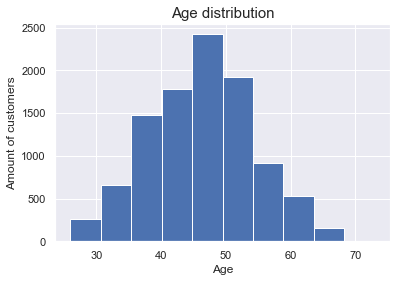

In [12]:
# Checking the overal age distribution histogram graph.
df["Customer_Age"].hist()
plt.xlabel("Age")
plt.ylabel("Amount of customers")
plt.title("Age distribution", fontsize=15)
plt.show()

In [13]:
df.groupby(by='Age_Range')['AttritedFlag'].sum().sort_values(ascending=False)

Age_Range
40-50    779
50-60    448
30-40    310
60+       58
20-30     32
Name: AttritedFlag, dtype: int32

In [14]:
# Define a new user-defined function which create a summary table for analyze that how selected variable impact to customer churn.

def table(main_df, df1, df2, col):
    '''
    INPUT:
    main_df - main dataframe with all variables
    df1 - Subset df which target group is 1.(for this axample churned customer)
    df2 - Subset df which target group is 0.(for this axample not-churned customer)
    col - column's name of the data frame
    
    OUTPUT:
    comp_df - a new sumary table with selected column variables. Table has the following info:
            1.Frenquency Ratio
            2.Not-Churned Percentile
            3.Churned Percenile
            4.Diffirence between overall churned ratio and 
    '''
    # overall churned ratio colculated
    overall_churned_perc = (main_df['AttritedFlag'].sum()/main_df.shape[0]).round(2)
    print('Overall Churned Ratio:', overall_churned_perc)
    
    freq_ratio = (main_df[col].value_counts()/main_df.shape[0]).round(2) #1.Frenquency Ratio
    notchurned_perc = (df2[col].value_counts()/main_df[col].value_counts()).round(2)#2.Not-Churned Percentile
    churned_perc = (df1[col].value_counts()/main_df[col].value_counts()).round(2) #3.Churned Percenile
    

    comp_df = pd.merge(freq_ratio,(pd.merge(notchurned_perc, churned_perc, left_index=True, right_index=True)), left_index=True, right_index=True )
    comp_df.columns = ['freq_ratio','notchurned_perc', 'churned_perc' ]
    comp_df['Diff_overall'] = (main_df['AttritedFlag'].sum()/main_df.shape[0]).round(2) - comp_df['churned_perc']
    
    return comp_df.style.bar(subset=['freq_ratio','Diff_overall'], align='mid', color=['#d65f5f', '#5fba7d'])

In [15]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Age_Range', 'AttritedFlag'],
      dtype='object')

In [16]:
# summary table for analyze that how Age impact to customer churn
# use new user-defined function 
table(df,churned,notchurned,'Age_Range')

Overall Churned Ratio: 0.16


,freq_ratio,notchurned_perc,churned_perc,Diff_overall
40-50,0.46,0.83,0.17,-0.01
50-60,0.26,0.83,0.17,-0.01
30-40,0.21,0.85,0.15,0.01
60+,0.04,0.86,0.14,0.02
20-30,0.03,0.88,0.12,0.04


#### Gender vs Churn

The difference is too small to say that one gender is more eager to churn.

Text(0, 0.5, '# of customers')

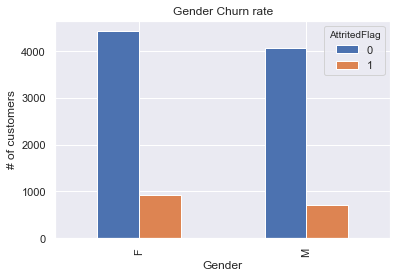

In [17]:
# Checking the gender distribution grouped by AttritedFlag

%matplotlib inline
pd.crosstab(df['Gender'], df['AttritedFlag']).plot(kind='bar')
plt.title('Gender Churn rate')
plt.xlabel('Gender')
plt.ylabel('# of customers')

In [18]:
# summary table for analyze that how Gender impact to customer churn
# use new user-defined function 
table(df,churned,notchurned, 'Gender')

Overall Churned Ratio: 0.16


,freq_ratio,notchurned_perc,churned_perc,Diff_overall
F,0.53,0.83,0.17,-0.01
M,0.47,0.85,0.15,0.01


#### Education level vs churn

The "Education level" - distribution of the churn/nonchurned customers shows no difference.
The majority of people has a graduate education level followed by graduate and high school. 15% of the population has an unknown education level.

Text(0, 0.5, '# of customers')

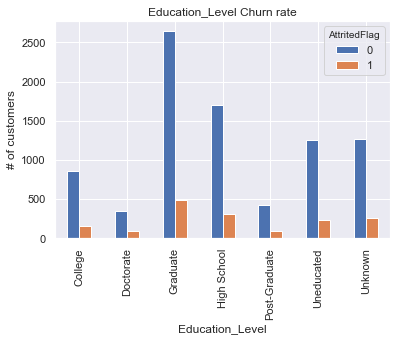

In [19]:
# Checking the education level distribution grouped by AttritedFlag
%matplotlib inline
pd.crosstab(df['Education_Level'], df['AttritedFlag']).plot(kind='bar')
plt.title('Education_Level Churn rate')
plt.xlabel('Education_Level')
plt.ylabel('# of customers')

In [20]:
# summary table for analyze that how education level impact to customer churn
# use new user-defined function 
table(df,churned,notchurned, 'Education_Level')

Overall Churned Ratio: 0.16


,freq_ratio,notchurned_perc,churned_perc,Diff_overall
Graduate,0.31,0.84,0.16,0
High School,0.2,0.85,0.15,0.01
Unknown,0.15,0.83,0.17,-0.01
Uneducated,0.15,0.84,0.16,0
College,0.1,0.85,0.15,0.01
Post-Graduate,0.05,0.82,0.18,-0.02
Doctorate,0.04,0.79,0.21,-0.05


#### Income category vs churn

We notice that income category 60K-80K customer's churned ratio seperate a little bit (%3) from overall ratio.
The larget amount of our customers earns less then $40k a year.

Text(0, 0.5, '# of customers')

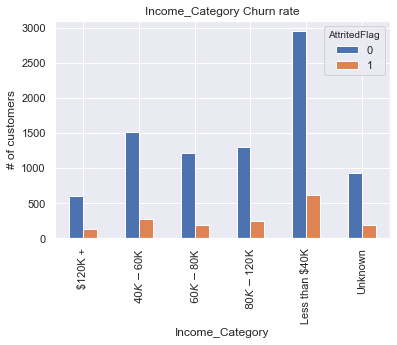

In [21]:
# Checking the Income distribution grouped by AttritedFlag
%matplotlib inline
pd.crosstab(df['Income_Category'], df['AttritedFlag']).plot(kind='bar')
plt.title('Income_Category Churn rate')
plt.xlabel('Income_Category')
plt.ylabel('# of customers')

In [22]:
# summary table for analyze that how Income impact to customer churn
# use new user-defined function 
table(df,churned,notchurned, 'Income_Category')

Overall Churned Ratio: 0.16


,freq_ratio,notchurned_perc,churned_perc,Diff_overall
Less than $40K,0.35,0.83,0.17,-0.01
$40K - $60K,0.18,0.85,0.15,0.01
$80K - $120K,0.15,0.84,0.16,0
$60K - $80K,0.14,0.87,0.13,0.03
Unknown,0.11,0.83,0.17,-0.01
$120K +,0.07,0.83,0.17,-0.01


#### Number of products bought vs churn

Here we see a shift in the distribution when we compare the churned vs the nonchurned. It's clear that the non churned customers tend to buy more products (more than 3 products) then the churned customers.

Text(0, 0.5, '# of customers')

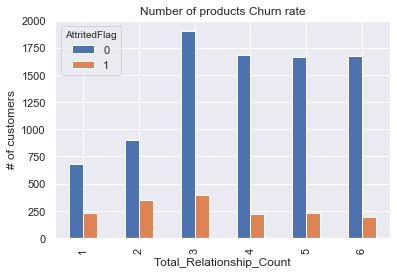

In [23]:
# Checking the number of products distribution grouped by AttritedFlag
%matplotlib inline
pd.crosstab(df['Total_Relationship_Count'], df['AttritedFlag']).plot(kind='bar')
plt.title('Number of products Churn rate')
plt.xlabel('Total_Relationship_Count')
plt.ylabel('# of customers')

In [24]:
# summary table for analyze that how Total_Relationship_Count impact to customer churn
# use new user-defined function 
table(df,churned,notchurned, 'Total_Relationship_Count')

Overall Churned Ratio: 0.16


,freq_ratio,notchurned_perc,churned_perc,Diff_overall
3,0.23,0.83,0.17,-0.01
4,0.19,0.88,0.12,0.04
5,0.19,0.88,0.12,0.04
6,0.18,0.89,0.11,0.05
2,0.12,0.72,0.28,-0.12
1,0.09,0.74,0.26,-0.1


#### Months inactive vs churn

We notice that grader than 1 month inactivity in the last 1 year is impact to churn.

It's clear that the most of the customers show a 3 month inactivity. It can be said that most of the active members (less then 3 months) can be found within the non churning customers.

Text(0, 0.5, '# of customers')

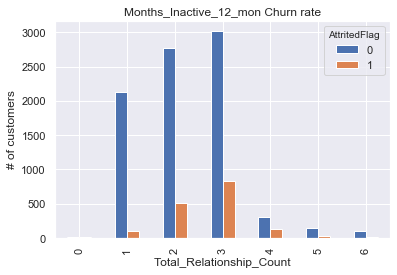

In [25]:
# Checking the inactive months last 1 year distribution grouped by AttritedFlag
%matplotlib inline
pd.crosstab(df['Months_Inactive_12_mon'], df['AttritedFlag']).plot(kind='bar')
plt.title('Months_Inactive_12_mon Churn rate')
plt.xlabel('Total_Relationship_Count')
plt.ylabel('# of customers')

In [26]:
# summary table for analyze that how Months_Inactive_12_mon impact to customer churn
# use new user-defined function 
table(df,churned,notchurned, 'Months_Inactive_12_mon')

Overall Churned Ratio: 0.16


,freq_ratio,notchurned_perc,churned_perc,Diff_overall
3,0.38,0.79,0.21,-0.05
2,0.32,0.85,0.15,0.01
1,0.22,0.96,0.04,0.12
4,0.04,0.7,0.3,-0.14
5,0.02,0.82,0.18,-0.02
6,0.01,0.85,0.15,0.01
0,0,0.48,0.52,-0.36


### Question3- How are the relationship with the variables vs churn ? 

In this question, we are trying to understand the relationship between each different variables.
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

You can find more detail about Correlation Matrix here [https://www.displayr.com/what-is-a-correlation-matrix/#:~:text=%20What%20is%20a%20Correlation%20Matrix%3F%20%201,Pearson%E2%80%99s%20Product-Moment%20Correlation%20%28r%29.%20It%20is...%20More%20]


**Results:**

The variables **Total_Trans_Ct**, **Total_Ct_Chng_Q4_Q1** and **Total_Revolving_Bal** are the top 3 features that most directly and negatively influence the churn of customers. In other words, the higher the value of these 3 variables mentioned, the lower the churn rate of these customers.


In the other analysis spectrum, the **Contacts_Count_12_mon** and **Months_Inactive_12_mon** variables are the 2 main features that have a positive correlation with the churn target variable. This means that the higher the value of these 2 mentioned variables, the higher the churn rate of the public.

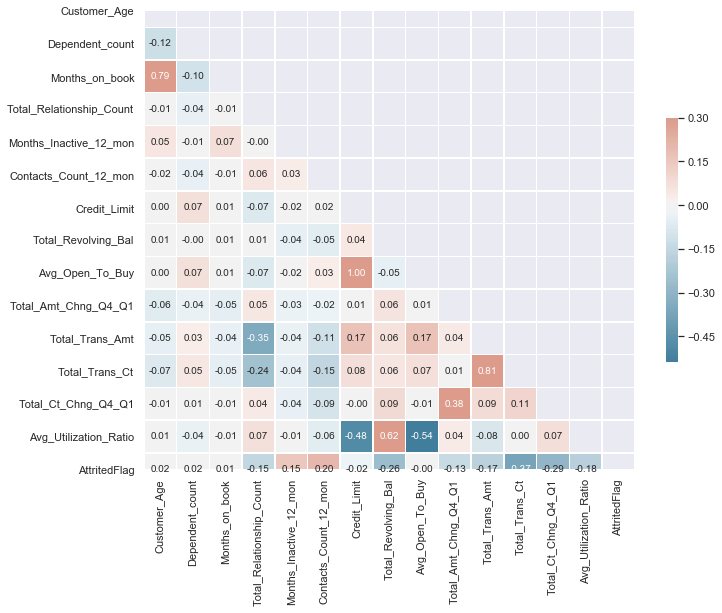

In [27]:
# Correlation Matrix

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True , fmt=".2f", mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

###  What are the diffirences between Non Churn and Churn Profiles ?

According to the EDA above, the profiles underneed can be made. It's clear that the main difference lays in the "product variables" of the customers. A churning customers tends to be less active then an existing customer. It's clear that the most influential parameters are features related to the activity of the customer.

In [28]:
# take a look at the summary statistics associated with the quantitative variables in your dataset.
# percentile list 
perc =[.20, .40, .60, .80] 
  
# list of dtypes to include 
include =['object', 'float', 'int'] 
  
# calling describe method 
churned_profiles = churned.describe(percentiles = perc, include = include).transpose()[['count','freq','top','mean','min','max']]
churned_profiles

,count,freq,top,mean,min,max
Attrition_Flag,1627,1627,Attrited Customer,NaN,NaN,NaN
Gender,1627,930,F,NaN,NaN,NaN
Education_Level,1627,487,Graduate,NaN,NaN,NaN
Marital_Status,1627,709,Married,NaN,NaN,NaN
Income_Category,1627,612,Less than $40K,NaN,NaN,NaN
Card_Category,1627,1519,Blue,NaN,NaN,NaN
Credit_Limit,1627,NaN,NaN,8136.04,1438.3,34516
Avg_Open_To_Buy,1627,NaN,NaN,7463.22,3,34516
Total_Amt_Chng_Q4_Q1,1627,NaN,NaN,0.694277,0,1.492
Total_Ct_Chng_Q4_Q1,1627,NaN,NaN,0.554386,0,2.5


In [29]:
# calling describe method 
notchurned_profiles = notchurned.describe(percentiles = perc, include = include).transpose()[['count','freq','top','mean','min','max']]
notchurned_profiles

,count,freq,top,mean,min,max
Attrition_Flag,8500,8500,Existing Customer,NaN,NaN,NaN
Gender,8500,4428,F,NaN,NaN,NaN
Education_Level,8500,2641,Graduate,NaN,NaN,NaN
Marital_Status,8500,3978,Married,NaN,NaN,NaN
Income_Category,8500,2949,Less than $40K,NaN,NaN,NaN
Card_Category,8500,7917,Blue,NaN,NaN,NaN
Credit_Limit,8500,NaN,NaN,8726.88,1438.3,34516
Avg_Open_To_Buy,8500,NaN,NaN,7470.27,15,34516
Total_Amt_Chng_Q4_Q1,8500,NaN,NaN,0.77251,0.256,3.397
Total_Ct_Chng_Q4_Q1,8500,NaN,NaN,0.742434,0.028,3.714


## 2_Prepare Data for Modelling 

Before we start training a model we must prepare our data. Different steps that we can undertake:

- Create e new data frame for modelling 
- Drop unnecessary colums
- Control missing ve duplicate variables / Handling the missing values
- Convert the non-numeric data into numeric
- Split the data into train and test sets.
- Scale the feature values to a uniform range.

In [30]:
# Create new dataframe for modelling
# Drop unnecessary columns
model_df = df.drop(columns= ['Attrition_Flag','Age_Range'])

model_df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,AttritedFlag
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


In [31]:
# Check for duplicates, True if duplicates are present
print ('Duplicate Variable:' , model_df.duplicated().any())


# the number of columns with any missing values
if model_df.columns[model_df.isnull().sum() > 0].shape[0] > 0:
    model_df.columns[model_df.isnull.sum() > 0]
else:
    print("No Missing valeus are found")

Duplicate Variable: False
No Missing valeus are found


In [32]:
# Convert the non-numeric data into numeric

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in model_df.columns.values:
    # Compare if the dtype is object
    if model_df[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        model_df[col]=le.fit_transform(model_df[col])

In [33]:
model_df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,AttritedFlag
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
818770008,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
713982108,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
769911858,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
709106358,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


In [34]:
# Import train_test_split
from sklearn.model_selection import train_test_split

#Split into explanatory and response variables
X = model_df.drop('AttritedFlag', axis=1)
y = df['AttritedFlag']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

In [35]:
print(X.shape)
print(y.shape)

(10127, 19)
(10127,)


In [36]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

## 3_Model Data

Essentially, predicting if a credit card customer will be churned or not is a classification task. Our dataset contains more instances that correspond to "Not Churned" status than instances corresponding to "Churned" status. Specifically, out of 690 instances, there are 8,500 (84%) customers that got not churned and 1,627 (16%) customers that got churned.

This gives us a benchmark. A good machine learning model should be able to accurately predict the status of the applications with respect to these statistics.

Which model should we pick? A question to ask is: are the features that affect the credit card customer churned process correlated with each other? Although we can measure correlation, that is outside the scope of this notebook, so we'll rely on our intuition that they indeed are correlated for now. Because of this correlation, we'll take advantage of the fact that generalized linear models perform well in these cases. Let's start our machine learning modeling with a Logistic Regression model (a generalized linear model).

In [37]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression(solver="lbfgs")

# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 4_Making predictions and evaluating performance

We will now evaluate our model on the test set with respect to classification accuracy. But we will also take a look the model's confusion matrix. 
In the case of predicting credit card customers churned, it is equally important to see if our machine learning model is able to predict the churn status of the customers as churned that originally got churned. 

The confusion matrix helps us to view our model's performance from these aspects.

In [38]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, y_test))

# Print the confusion matrix of the logreg model
confusion_matrix(y_test, y_pred)

Accuracy of logistic regression classifier:  0.8920697597894044


array([[2495,   48],
       [ 280,  216]], dtype=int64)

In [39]:
print('Logistic Regression:')
print('Traning Model accruracy: {:.2%}'.format(logreg.score(rescaledX_train, y_train)))
print('Test Model accruracy: {:.2%}'.format(logreg.score(rescaledX_test, y_test)))

Logistic Regression:
Traning Model accruracy: 90.45%
Test Model accruracy: 89.21%


## 5_Results

Our model was pretty good! It was able to yield an accuracy score of almost **89%**.

The result of prediting customer churn, our model score;

* Traning Model accruracy: **90.45%**
* Test Model accruracy: **89.21%**

While building this customer churn predictor, we tackled some of the most widely-known preprocessing steps such as scaling, label encoding, and missing value imputation. We finished with logistic regression model to predict customer churn.